In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [60]:
data=pd.read_csv(r"Revenue_prediction.csv",na_values='?',skipinitialspace = True)


In [61]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [62]:
data.shape

(100, 8)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [64]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Name"]=le.fit_transform(data["Name"])
data["Franchise"]=le.fit_transform(data["Franchise"])
data["Category"]=le.fit_transform(data["Category"])
data["City"]=le.fit_transform(data["City"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    int32  
 2   Franchise     100 non-null    int32  
 3   Category      100 non-null    int32  
 4   City          100 non-null    int32  
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int32(4), int64(3)
memory usage: 4.8 KB


In [66]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,40,1,12,0,55,5.5,5953753
1,102,14,0,19,1,72,6.8,7223131
2,103,16,1,5,4,25,1.9,2555379
3,104,60,1,11,2,18,2.5,2175511
4,105,68,1,13,3,48,4.2,4816715


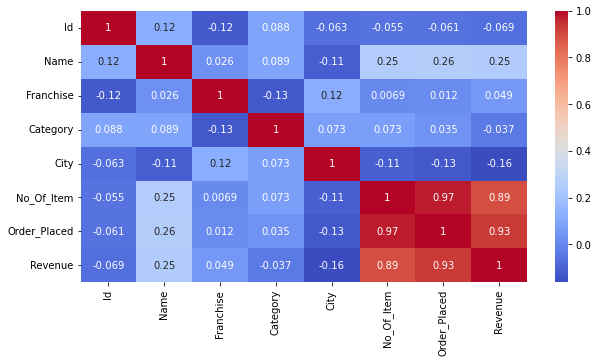

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [68]:
#Feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if ((data[col].dtype !='object') & (col !='Revenue')):
         col_list.append(col)
    
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                 for i in range(len(x.columns))]
print(vif_data)

        feature         VIF
0            Id    9.476687
1          Name    4.358419
2     Franchise    2.167583
3      Category    5.234237
4          City    2.044211
5    No_Of_Item  113.558852
6  Order_Placed   98.322943


In [69]:
#Linear regression
X=data.drop(columns=['Revenue'])
y=data['Revenue']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)

[6537412.85243193 5597765.89858887 3807350.25023917 4159542.53260737
 4413799.9457745  3759089.44509529 3966946.93586252 3369165.15981887
 3987178.40305926 6574848.19089853 5583361.24360599 3154401.24660468
 2761390.9924968  2118670.29495647 3442792.69086833 4639659.50428122
 5134088.2298328  1447153.26533922 1710549.85841516 2210063.69011158
 7459296.16854557 1962702.76283745 1694533.72617774 5877662.3544335
 3035773.11614593 3377901.87845018 7756789.48782092 7110407.20698586
 5311270.96528226 2651868.27888059]


In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

560088.2500970154

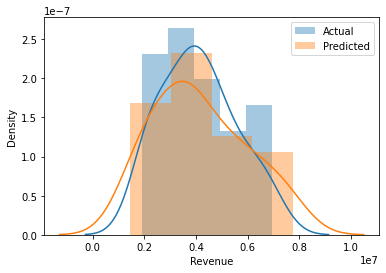

In [71]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [72]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

739286.0651800493

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

631626.4404544831